In [1]:
import pandas as pd                      #panaas is database library 
import numpy as np                       #numpy is a numerical library
import matplotlib.pyplot as plt          #matplot is a graphical representation library

In [2]:
#read the csv file using pandas read function
dataset=pd.read_csv("Social_Network_ads.csv")   

In [3]:
#To view the csv dataset
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
# convert the categorical data into numerical data using get_dummies is function
dataset=pd.get_dummies(dataset, drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [5]:
# In csv file drop userID column
dataset.drop("User ID",axis=1)

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [6]:
#number of purchased 
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
#To Assign the input columns into independent variable
independent=dataset[["Age","EstimatedSalary","Gender_Male"]]

In [8]:
#To view the input columns
independent

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [9]:
#To Assign the output column into dependent variable
dependent=dataset[["Purchased"]]

In [10]:
#To view the input columns
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
#Split the train and test set data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [12]:
# Model creation using the DecisionTreeClassifier function
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
# Model creation Using GridsearchCV 
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_features':['sqrt','log2']}
grid=GridSearchCV(DecisionTreeClassifier(), param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
               

In [14]:
# print the tabular column of best performance of the parameter using grid function
re=grid.cv_results_
grid_predictions=grid.predict(x_test)
print("The confusion_matrix value for best parameter {}:".format(grid.best_params_))
table=pd.DataFrame.from_dict(re)
table

The confusion_matrix value for best parameter {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000000,0.000000,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.808511,0.827957,0.860215,0.832143,0.021332,7
1,0.002903,0.002057,0.004835,0.006838,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.872340,0.795699,0.849462,0.839286,0.032128,4
2,0.004020,0.000697,0.000000,0.000000,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.840426,0.838710,0.881720,0.853571,0.019863,1
3,0.004301,0.000150,0.000000,0.000000,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.840426,0.795699,0.860215,0.832143,0.026943,7
4,0.000000,0.000000,0.002724,0.003852,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.829787,0.827957,0.881720,0.846429,0.024900,2
5,0.005758,0.003852,0.000000,0.000000,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.851064,0.795699,0.860215,0.835714,0.028466,5
6,0.003567,0.000931,0.000000,0.000000,entropy,log2,best,"{'criterion': 'entropy', 'max_features': 'log2...",0.851064,0.849462,0.806452,0.835714,0.020647,5
7,0.002438,0.001724,0.001501,0.002123,entropy,log2,random,"{'criterion': 'entropy', 'max_features': 'log2...",0.819149,0.806452,0.913978,0.846429,0.047919,2


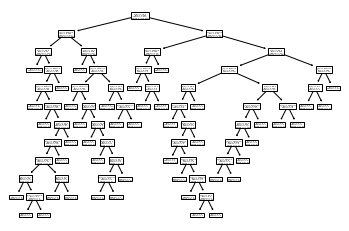

In [34]:
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [18]:
y_pred=classifier.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [20]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)

In [21]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        79
           1       0.81      0.85      0.83        41

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



In [22]:
print(cm)

[[71  8]
 [ 6 35]]


In [26]:
classifier.predict([[35,15000,1]])

array([0], dtype=int64)

In [29]:
age_input=int(input("Age:"))
salary_input=int(input("Estimated_Salar:"))
gender_input=int(input("Gender_Male:"))

Age:40
Estimated_Salar:50000
Gender_Male:1


In [30]:
Future_Prediction=classifier.predict([[age_input,salary_input,gender_input]])#→change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[0]
